### <center> Google-play-store Prediction

| **Column**       | **Description**                                                                 |
|------------------|----------------------------------------------------------------------------------|
| **App**          | Name of the application.                                                         |
| **Category**     | Category or genre of the app on the Play Store.                                  |
| **Rating**       | Average user rating (on a scale of 1 to 5).                                      |
| **Reviews**      | Total number of user reviews submitted.                                          |
| **Size**         | Size of the app (in MB, KB, or "Varies with device").                            |
| **Installs**     | Number of times the app has been installed.                                      |
| **Type**         | Whether the app is Free or Paid.                                                 |
| **Price**        | Cost of the app (0 for free apps, or actual price for paid ones).                |
| **ContentRating**| Target age group or audience category (e.g., Everyone, Teen).                    |
| **Genres**       | Detailed genre(s) of the app (can include sub-genres).                           |
| **LastUpdated**  | Last date the app was updated.                                                   |
| **CurrentVer**   | Version number of the app currently available on the Play Store.                 |
| **AndroidVer**   | Minimum required Android version to run the app.                                 |


## Machine Learning Feature and Target Definition

###  Target Variable (What we're predicting)
- `High_Rating`: Whether the app has a high user rating (e.g., 4.0 or above), typically a binary variable indicating high (1) or low (0) rating.

###  Feature Variables (Inputs used for prediction)
- `Installs`: Number of times the app has been installed from the Play Store.
- `Size`: Size of the app (in MB or KB), representing storage requirements.
- `Price`: Cost of the app; 0 for free apps, otherwise the paid price.
- `Reviews`: Total number of user reviews submitted for the app.
- `Type`: Indicates if the app is `Free` or `Paid`.


## Machine Learning2 Feature and Target Definition

###  Target Variable (What we're predicting)
- `Type`: Whether the app is Free (`0`) or Paid (`1`).

###  Feature Variables (Inputs used for prediction)
- `Rating`: Average user rating of the app (scale 1 to 5).
- `Size`: Size of the app (in MB or KB), representing storage requirements.
- `Installs`: Number of times the app has been installed.
- `Reviews`: Total number of user reviews submitted.
- `Price`: Cost of the app; 0 for free apps, otherwise the paid price.


## Importing all libraries required for the Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import  tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import cross_val_score

## Importing google-play-store Dataset

In [3]:
df=pd.read_csv("googleplaystore.csv")
df.head(10)

,googleplaystore,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Unnamed: 1,NaN,NaN,Unnamed:4,Unnamed: 5,NaN,NaN,NaN,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,NaN
1,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
2,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
5,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
6,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
7,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
8,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
9,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


## Shape of the DataFrame(rows,columns)

In [4]:
df.shape

(10843, 13)

## <center> STEP 1: PREPROCESSING

#### skiprows=2 tells pandas to skip the first two rows when reading the file, which is useful if the file contains non-data rows at the top

In [5]:
df=pd.read_csv("googleplaystore.csv",skiprows=2)
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Checking for Missing Values in the DataFrame

In [6]:
df.isnull().sum()

App                 0
Category            0
Rating           1474
Reviews             0
Size                0
Installs            0
Type                1
Price               0
ContentRating       1
Genres              0
LastUpdated         0
CurrentVer          8
AndroidVer          3
dtype: int64

### Getting a Summary of the DataFrame with `df.info()`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10841 non-null  object 
 1   Category       10841 non-null  object 
 2   Rating         9367 non-null   float64
 3   Reviews        10841 non-null  object 
 4   Size           10841 non-null  object 
 5   Installs       10841 non-null  object 
 6   Type           10840 non-null  object 
 7   Price          10841 non-null  object 
 8   ContentRating  10840 non-null  object 
 9   Genres         10841 non-null  object 
 10  LastUpdated    10841 non-null  object 
 11  CurrentVer     10833 non-null  object 
 12  AndroidVer     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Getting the Null value Percentage

In [8]:
# Assuming df is your DataFrame
null_percentage = (df.isnull().sum() / len(df)) * 100
# Display the percentage of missing values for each column
print(null_percentage)

App               0.000000
Category          0.000000
Rating           13.596532
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.009224
Price             0.000000
ContentRating     0.009224
Genres            0.000000
LastUpdated       0.000000
CurrentVer        0.073794
AndroidVer        0.027673
dtype: float64


### Split the columns for more data 
### Lastupdated=LastUpdated_Month_data+LastUpdated_Year

In [9]:
df["LastUpdated_Month_date"]=df.LastUpdated.apply(lambda x: x.split(",")[0])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,LastUpdated_Month_date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January 7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January 15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August 1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June 8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June 20


In [10]:
df["LastUpdated"] = df["LastUpdated"].fillna('')

In [11]:
df['LastUpdated_Year'] = df['LastUpdated'].str.split(',').str[1].str.strip()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June 20,2018


### After Split the columns we delete the original we donot require that

In [12]:
df.drop("LastUpdated",axis=1,inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018


### Handling null values in Rating columns
- #### We handle using dropping that columns

In [13]:
df=df[~df.Rating.isnull()]
df.shape

(9367, 14)

### After cleaning processing for rating columns if we check the isnull() function we get ZERO

In [14]:
#Because we drop the null columns 
df.Rating.isnull().sum()

0

### It is used get the data in 10472 index columns

In [15]:
#to get that column
df.loc[10472,:]

App                       Life Made WI-Fi Touchscreen Photo Frame
Category                                                      1.9
Rating                                                       19.0
Reviews                                                      3.0M
Size                                                       1,000+
Installs                                                     Free
Type                                                            0
Price                                                    Everyone
ContentRating                                                 NaN
Genres                                          February 11, 2018
CurrentVer                                             4.0 and up
AndroidVer                                                    NaN
LastUpdated_Month_date                                     1.0.19
LastUpdated_Year                                              NaN
Name: 10472, dtype: object

### We want to see that data in data frame using some conditions

In [16]:
#To get row where the androidver is null and category==1.9
df[(df['AndroidVer'].isnull() & (df.Category=="1.9"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",4.0 and up,NaN,1.0.19,NaN


### We clearly see that this columns is something not good so we can easily drop that column

In [17]:
# we drop that column 
df=df[~(df['AndroidVer'].isnull() & (df.Category=="1.9"))]

### Filtering Rows with Missing Values in the 'AndroidVer' Column

In [18]:
df[df['AndroidVer'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,4.4,NaN,July 20,2018
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,1.1,NaN,March 27,2018


In [19]:
df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
ContentRating             0
Genres                    0
CurrentVer                4
AndroidVer                2
LastUpdated_Month_date    0
LastUpdated_Year          0
dtype: int64

In [20]:
df[df['AndroidVer'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,4.4,NaN,July 20,2018
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,1.1,NaN,March 27,2018


### Filing the null values using mean,median,mode
- mean and median is used for Numerical columns
- mode is used for categorical columns

### We get the most frequency value using mode 

In [21]:
# to get the Mode of the column
df['AndroidVer'].mode()[0]

'4.1 and up'

### After getting that value we fill the null values using that value

In [22]:
# Filling the missing values with the mode values
df['AndroidVer']=df['AndroidVer'].fillna(df['AndroidVer'].mode()[0])

In [23]:
df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
ContentRating             0
Genres                    0
CurrentVer                4
AndroidVer                0
LastUpdated_Month_date    0
LastUpdated_Year          0
dtype: int64

### To get the Non-null values rows in currentversion

In [24]:
#to get the Non-null values rows in currentversion
df[~df['CurrentVer'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,1.0.0,4.1 and up,June 18,2017
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,1.48,4.1 and up,July 25,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,1,4.1 and up,July 6,2018
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,Varies with device,Varies with device,January 19,2015


### Same process we applied for this column also because this is also categorical colums

In [25]:
# to get the mode in current version
df['CurrentVer'].mode()[0]

'Varies with device'

In [26]:
#We set the mode in null Columns
df['CurrentVer']=df['CurrentVer'].fillna(df['CurrentVer'].mode()[0])

In [27]:
df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
ContentRating             0
Genres                    0
CurrentVer                0
AndroidVer                0
LastUpdated_Month_date    0
LastUpdated_Year          0
dtype: int64

<center>

#### 💰💻 **Handling Price Column Data Type** 🏷️

</center>
|

### Convert all incorrect data types to correct data types this is also preprocessing the data 

#### The `Price` column contains prices of apps, which may be in string format and include a dollar sign (e.g., `"$4.99"`). This line cleans the column by converting all values to float numbers, removing the dollar sign where necessary.

In [28]:
df.Price=df.Price.apply(lambda x:0 if x=="0" else float(x[1:]))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     9366 non-null   object 
 1   Category                9366 non-null   object 
 2   Rating                  9366 non-null   float64
 3   Reviews                 9366 non-null   object 
 4   Size                    9366 non-null   object 
 5   Installs                9366 non-null   object 
 6   Type                    9366 non-null   object 
 7   Price                   9366 non-null   float64
 8   ContentRating           9366 non-null   object 
 9   Genres                  9366 non-null   object 
 10  CurrentVer              9366 non-null   object 
 11  AndroidVer              9366 non-null   object 
 12  LastUpdated_Month_date  9366 non-null   object 
 13  LastUpdated_Year        9366 non-null   object 
dtypes: float64(2), object(12)
memory usage: 1.1+

### Converting the 'Reviews' Column to Integer Type

In [30]:
df.Reviews=df.Reviews.astype("int32")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     9366 non-null   object 
 1   Category                9366 non-null   object 
 2   Rating                  9366 non-null   float64
 3   Reviews                 9366 non-null   int32  
 4   Size                    9366 non-null   object 
 5   Installs                9366 non-null   object 
 6   Type                    9366 non-null   object 
 7   Price                   9366 non-null   float64
 8   ContentRating           9366 non-null   object 
 9   Genres                  9366 non-null   object 
 10  CurrentVer              9366 non-null   object 
 11  AndroidVer              9366 non-null   object 
 12  LastUpdated_Month_date  9366 non-null   object 
 13  LastUpdated_Year        9366 non-null   object 
dtypes: float64(2), int32(1), object(11)
memory u

<center>

#### 🧹📉 **Clean Up or Handle the INSTALLS Column** 🔧

</center>


In [32]:
df.Installs.describe

<bound method NDFrame.describe of 0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9366, dtype: object>

- #### 📌 Function to Clean 'Installs' Values by Removing Commas and Plus Signs

##### The `Installs` column in the dataset likely contains strings representing install counts, formatted with commas and a plus sign (e.g., `"1,000+"`, `"5,000,000+"`). These need to be cleaned and converted into integer format for analysis.

In [33]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [34]:
clean_installs("3,000+")

3000

In [35]:
type(clean_installs("300,00+"))

int

### Applying the `clean_installs` Function to the 'Installs' Column

In [36]:
df.Installs=df.Installs.apply(clean_installs)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     9366 non-null   object 
 1   Category                9366 non-null   object 
 2   Rating                  9366 non-null   float64
 3   Reviews                 9366 non-null   int32  
 4   Size                    9366 non-null   object 
 5   Installs                9366 non-null   int64  
 6   Type                    9366 non-null   object 
 7   Price                   9366 non-null   float64
 8   ContentRating           9366 non-null   object 
 9   Genres                  9366 non-null   object 
 10  CurrentVer              9366 non-null   object 
 11  AndroidVer              9366 non-null   object 
 12  LastUpdated_Month_date  9366 non-null   object 
 13  LastUpdated_Year        9366 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(10

In [38]:
df.Installs.describe

<bound method NDFrame.describe of 0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64>

<center>

#### 🧽📏 **Cleaning Size Column** 🧹

</center>


In [39]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018


#### App sizes in the dataset may be listed as strings with units like `"19M"` or `"500K"`. This function standardizes these values by converting all sizes to **kilobytes (KB)** and returning them as `float` values.

In [40]:
def clean_size(val):
    if 'M' in val:
        return float(float(val.replace("M", "")) * 1000)
    elif 'K' in val:
        return float(val.replace("K", ""))
    else:
        return float()

In [41]:
clean_size("19M")

19000.0

### After defining a function to convert app sizes into numeric values (in kilobytes), we apply it to the entire `Size` column:

In [42]:
df.Size=df.Size.apply(clean_size)

In [43]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018


<center>

#### 🚫❌ **Removing Rows with 'Unrated' and 'Adults Only 18+' Content Ratings** 🔞

</center>


In [44]:
df = df[~df['ContentRating'].isin(['Unrated', 'Adults only 18+'])]

<center>

### 🔍📊 **Identifying and Handling Outliers/Extreme Values** ⚖️

</center>



In [45]:
%matplotlib inline

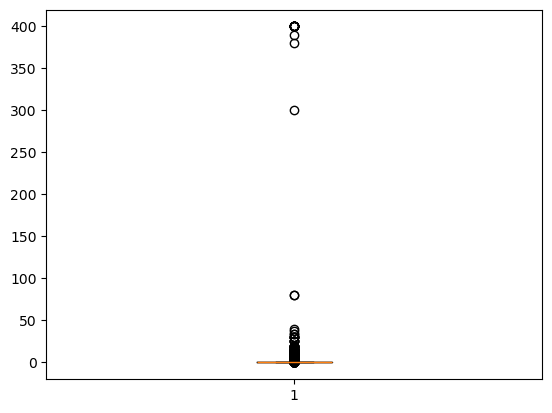

In [46]:
plt.boxplot(df.Price)
plt.show()

- #### 📌 Identifying Apps with Prices Above 200

In [47]:
df[df.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,1,7.0 and up,July 16,2018
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,1.0.0,4.4 and up,March 11,2018
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,1.0.1,4.1 and up,May 3,2018
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,2,4.0.3 and up,January 12,2018
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,3,4.4 and up,May 19,2018
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,1.1.1,4.3 and up,July 21,2018
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,1.6,4.0 and up,November 12,2017
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,1,4.0 and up,July 1,2018
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,1,4.1 and up,December 11,2017
5359,I am rich(premium),FINANCE,3.5,472,0.0,5000,Paid,399.99,Everyone,Finance,3.4,4.4 and up,May 1,2017


- #### 📌  Filtering Out Apps Priced Above 200

In [48]:
df=df[~(df.Price>200)]

- #### 📌 Identifying Apps with Price Greater Than 200

In [49]:
df[df.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year


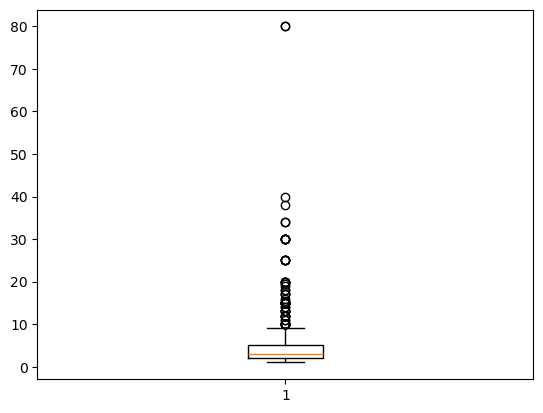

In [50]:
plt.boxplot(df[df.Price>0].Price)
plt.show()

- #### Filtering Apps with Price Greater Than 30

In [51]:
df[df.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,19,4.0.3 and up,June 18,2018
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,2.1.35,4.0 and up,October 2,2017
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,19,4.0.3 and up,June 18,2018
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,2.1.35,4.0 and up,October 2,2017
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,3.0.1,4.1 and up,April 4,2018
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,1,4.0.3 and up,July 18,2017


In [52]:
df=df[~(df.Price>30)]

In [53]:
df[df.Price>30].shape

(0, 14)

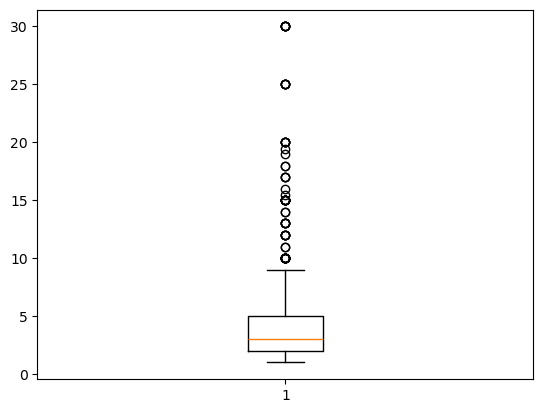

In [54]:
plt.boxplot(df[df.Price>0].Price)
plt.show()

In [55]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018


<center>

### 📊📈 **VISUALIZATION** 🔍

</center>


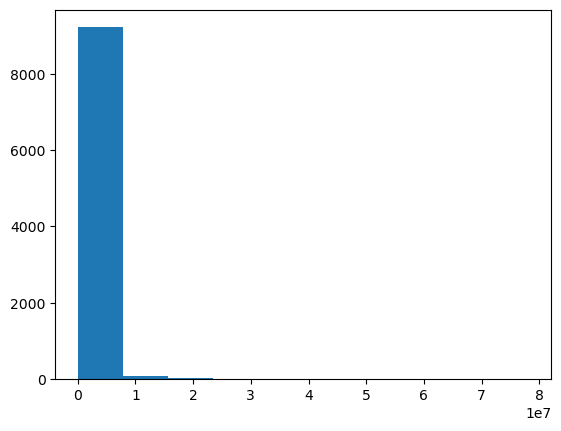

In [56]:
plt.hist(df.Reviews)
plt.show()

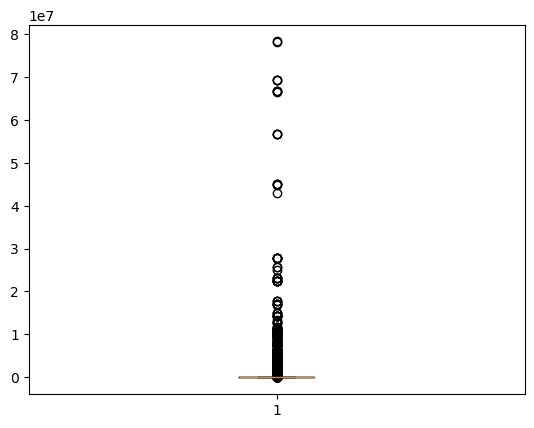

In [57]:
plt.boxplot(df.Reviews)
plt.show()

- #### Identifying Apps with Over 10 Million Reviews

In [58]:
df[df.Reviews>=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,August 1,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,August 3,2018
342,Viber Messenger,COMMUNICATION,4.3,11334799,0.0,500000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,July 18,2018
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,12.8.5.1121,4.0 and up,August 2,2018
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,Varies with device,Varies with device,August 3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,0.0,100000000,Free,0.0,Everyone,Communication,Varies with device,4.0.3 and up,August 2,2018
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,0.0,500000000,Free,0.0,Everyone,Tools,4.6.6,Varies with device,August 4,2018
7937,Shadow Fight 2,GAME,4.6,10981850,88000.0,100000000,Free,0.0,Everyone 10+,Action,1.9.38,3.0 and up,July 2,2018
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.0,100000000,Free,0.0,Everyone,Tools,3.1.2,4.0 and up,July 25,2018


- #### Cleaning Data by Removing Apps with More Than 10 Million Reviews

In [59]:
df=df[~(df.Reviews>10000000)]

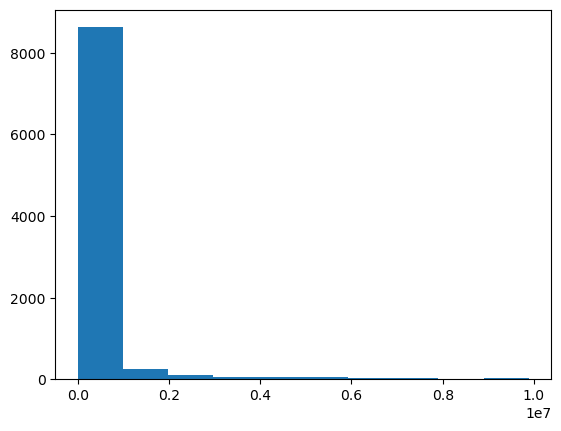

In [60]:
plt.hist(df.Reviews)
plt.show()

In [61]:
import warnings
warnings.filterwarnings("ignore")

- #### Understanding the Rating Distribution of Apps Using Seaborn's Distplot

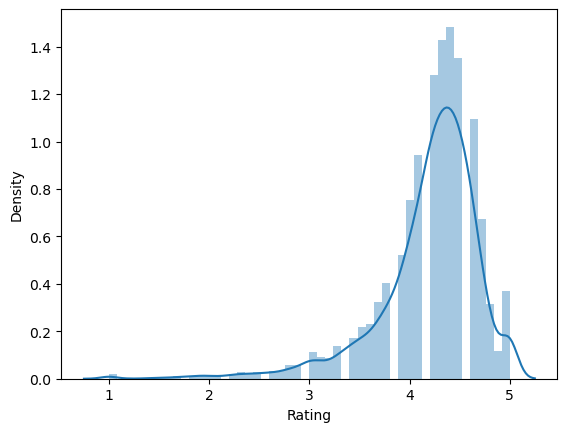

In [62]:
sns.distplot(df.Rating)
plt.show()

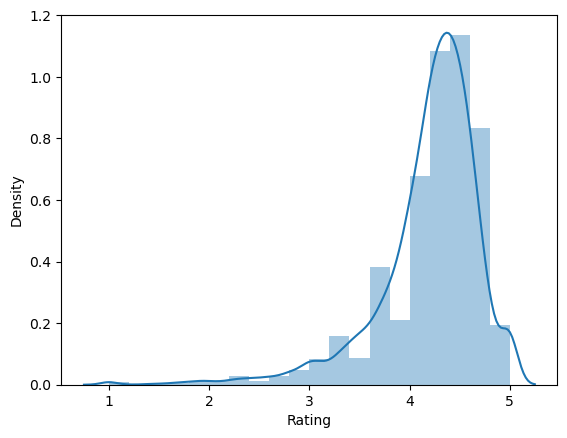

In [63]:
sns.distplot(df.Rating,bins=20)
plt.show()

- #### Visualizing Relationships Between Reviews, Size, Price, and Rating with Seaborn's Pairplot

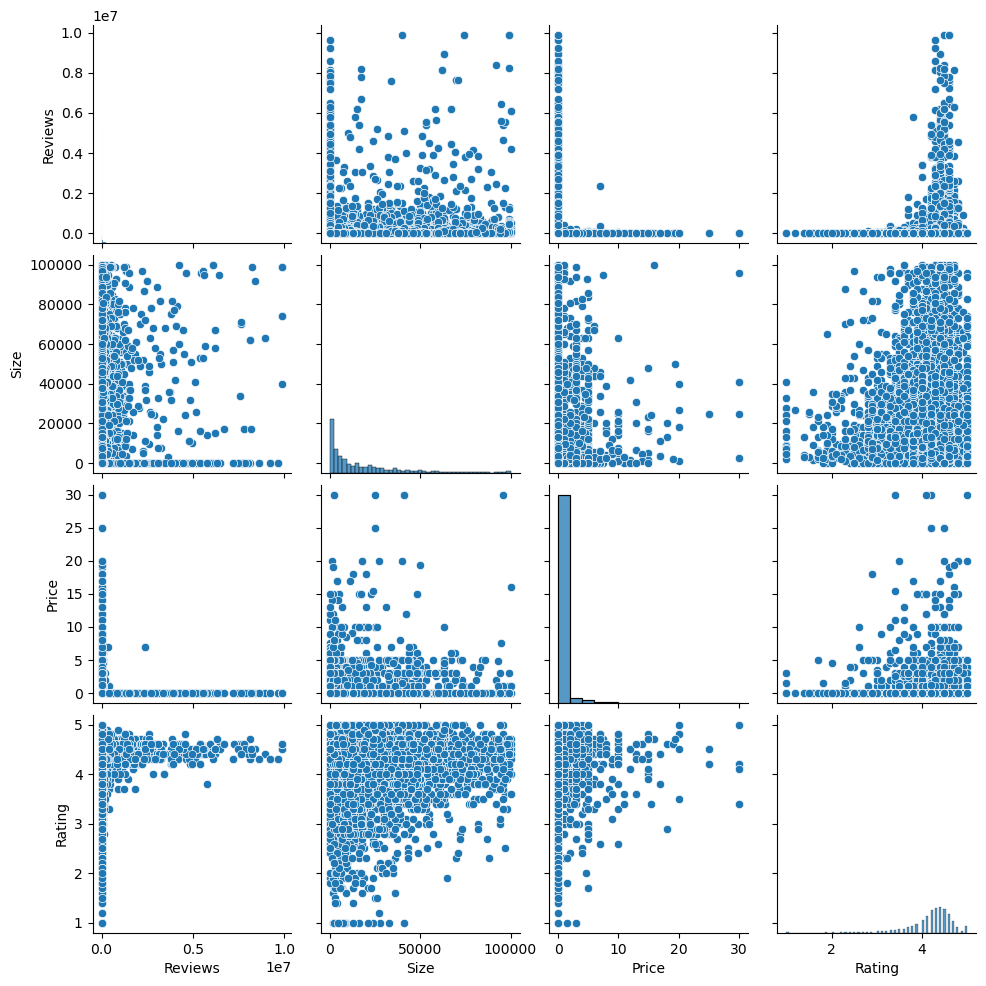

In [64]:
sns.pairplot(df[['Reviews','Size','Price','Rating']])
plt.show()

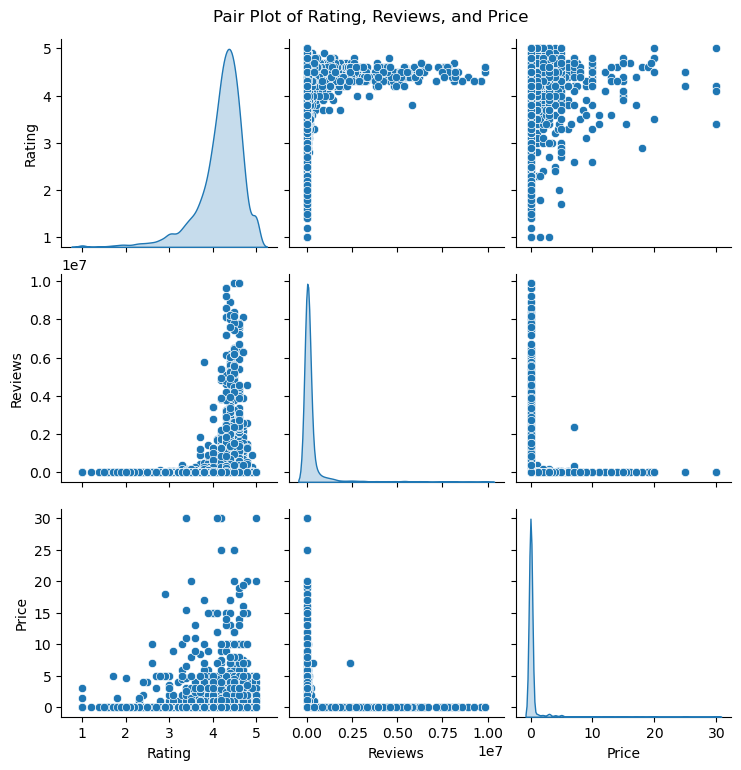

In [65]:
# Assuming inp1 is your DataFrame
# Create a pair plot for 'Rating', 'Reviews', and 'Price'
sns.pairplot(df[['Rating', 'Reviews', 'Price']], diag_kind='kde')

# Add a title
plt.suptitle('Pair Plot of Rating, Reviews, and Price', y=1.02)

# Show the plot
plt.show()

In [66]:
?pd.qcut

Signature:
pd.qcut(
    x,
    q,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    duplicates: 'str' = 'raise',
)
Docstring:
Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based
on sample quantiles. For example 1000 values for 10 quantiles would
produce a Categorical object indicating quantile membership for each data point.

Parameters
----------
x : 1d ndarray or Series
q : int or list-like of float
    Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
    array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
labels : array or False, default None
    Used as labels for the resulting bins. Must be of the same length as
    the resulting bins. If False, return only integer indicators of the
    bins. If True, raises an error.
retbins : bool, optional
    Whether to return the (bins, labels) or not. Can be useful if bins
    is given as a scalar.
precision : int, optional
    

- #### Discretizing App Size into Quantile-Based Categories (VL, L, M, H, VH)

In [67]:
df['Size_Bucket']=pd.qcut(df.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [68]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018,H
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018,L


- #### Summary of Ratings by Content Rating and Size Bucket

In [69]:
pd.pivot_table(data=df,index="ContentRating",columns="Size_Bucket",values="Rating")

Size_Bucket,VL,L,M,H,VH
ContentRating,,,,,
Everyone,4.233801,4.137606,4.176055,4.172851,4.219262
Everyone 10+,4.226316,4.218182,4.257500,4.237755,4.251773
Mature 17+,4.212088,4.096774,4.087129,4.018812,4.194175
Teen,4.260476,4.173387,4.221557,4.187554,4.274850


- #### Analyzing Median Ratings Across Content Ratings and Size Categories

In [70]:
pd.pivot_table(data=df,index="ContentRating",columns="Size_Bucket",values="Rating",aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
ContentRating,,,,,
Everyone,4.3,4.20,4.30,4.3,4.3
Everyone 10+,4.3,4.25,4.35,4.3,4.3
Mature 17+,4.2,4.25,4.20,4.1,4.2
Teen,4.3,4.30,4.30,4.2,4.3


- #### Analyzing App Ratings (Median) Across Different Content Ratings and Size Buckets

In [71]:
res=pd.pivot_table(data=df,index="ContentRating",columns="Size_Bucket",values="Rating",aggfunc=lambda x:np.quantile(x,0.2))

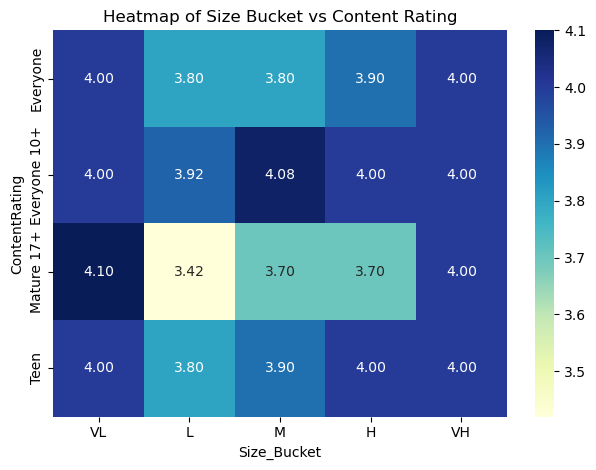

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your heatmap creation line
sns.heatmap(res, annot=True, fmt='.2f', cmap='YlGnBu')

# Display the heatmap
plt.title('Heatmap of Size Bucket vs Content Rating')
plt.xlabel('Size_Bucket')
plt.ylabel('ContentRating')
plt.tight_layout()
plt.show()


- #### Distribution of App Types (Paid vs Free)

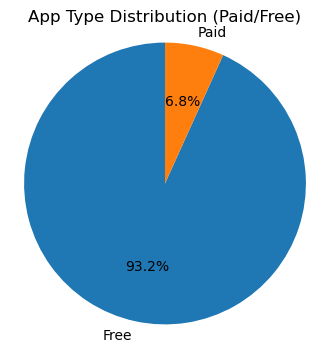

In [73]:
type_counts = df['Type'].value_counts()
# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('App Type Distribution (Paid/Free)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

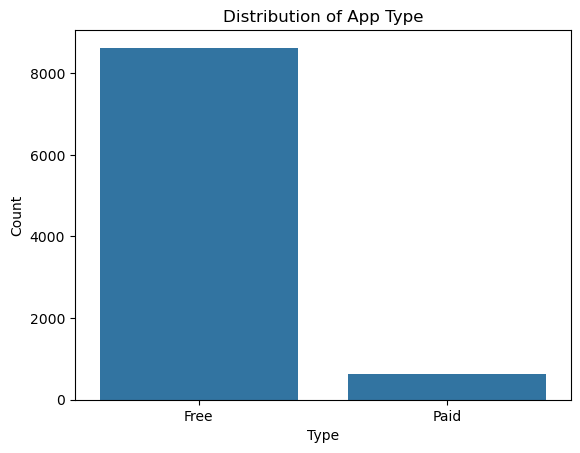

In [74]:
sns.countplot(data=df, x='Type')
plt.title('Distribution of App Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

- #### Violin Plot Showing the Distribution of App Ratings

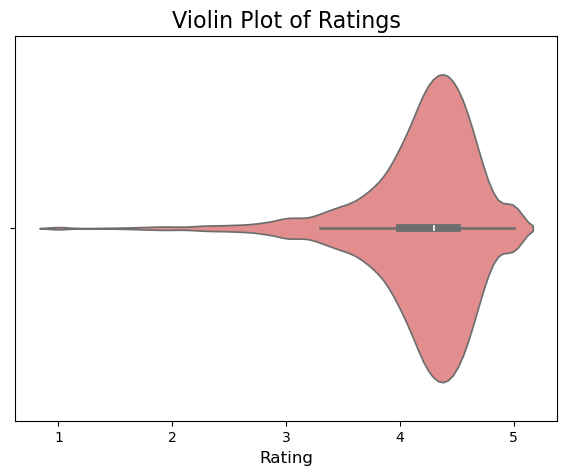

In [75]:
plt.figure(figsize=(7, 5))
sns.violinplot(x=df['Rating'], color='lightcoral')

# Add title and labels
plt.title('Violin Plot of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)

# Display the plot
plt.show()

<center>

### 🧑‍🔬📊 **HYPOTHESIS TESTING** 🔬

</center>


#### ✅ 1. ANOVA: Does app category affect ratings?

In [76]:
import scipy.stats as stats
import pandas as pd

# Group ratings by category
grouped = df[['Category', 'Rating']].dropna().groupby('Category')
category_ratings = [group['Rating'].values for _, group in grouped]

# Perform One-Way ANOVA
f_stat, p = stats.f_oneway(*category_ratings)

print(f"F-Statistic: {f_stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject Null Hypothesis: App category affects average ratings.")
else:
    print("Fail to Reject Null Hypothesis: No significant effect of category on ratings.")


F-Statistic: 8.981838084949386
P-value: 4.423209864493605e-42
Reject Null Hypothesis: App category affects average ratings.


#### ✅ 2. Correlation: Is there a relationship between app installs and reviews?

In [77]:
import scipy.stats as stats
import pandas as pd

# Drop NA values
df_corr = df[['Installs', 'Reviews']].dropna()

# Perform Pearson Correlation Test
corr, p = stats.pearsonr(df_corr['Installs'], df_corr['Reviews'])

print(f"Correlation Coefficient: {corr}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject Null Hypothesis: There is a significant correlation between installs and reviews.")
else:
    print("Fail to Reject Null Hypothesis: No significant correlation.")


Correlation Coefficient: 0.5490467254164874
P-value: 0.0
Reject Null Hypothesis: There is a significant correlation between installs and reviews.


In [78]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Month_date,LastUpdated_Year,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018,H
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018,L


### <center> Machine Learning

In [79]:
df['Type']

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10834    Free
10836    Free
10837    Free
10839    Free
10840    Free
Name: Type, Length: 9249, dtype: object

In [80]:
label_type=LabelEncoder()
df['Type']=label_type.fit_transform(df['Type'])

In [81]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9249, dtype: float64

In [82]:
# Create binary target: 1 for High Rating (>=4.0), 0 otherwise
df['High_Rating'] = np.where(df['Rating'] >= 4.0, 1, 0)

In [83]:
features=df[['Installs','Size','Price','Reviews','Type']]
target=df['High_Rating']

In [84]:
X_train,X_test,y_train,y_test=train_test_split(features,target,train_size=0.2,random_state=42)

#### LogisticRegression

In [85]:
model_log=LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [86]:
print(model_log.score(X_test,y_test))
print(model_log.score(X_train,y_train))
print(cross_val_score(model_log,features,target,cv=5).mean())

0.7868918918918919
0.7804218496484586
0.7855985265958224


#### DecisionTree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
print(model_tree.score(X_test,y_test))
print(model_tree.score(X_train,y_train))
print(cross_val_score(model_tree,features,target,cv=5).mean())

0.71
1.0
0.7037487027319369


In [90]:
y_predicted=model_tree.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, zero_division=0)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

# Print in markdown table format

print(f"| **Accuracy**      | {accuracy:.2%} |")
print(f"| **Precision**     | {precision:.2%} |")
print(f"| **Recall**        | {recall:.2%} |")
print(f"| **F1-Score**      | {f1:.2%} |")
print(f"| **RMSE**          | {rmse:.2f} |")


| **Accuracy**      | 71.00% |
| **Precision**     | 82.76% |
| **Recall**        | 79.74% |
| **F1-Score**      | 81.22% |
| **RMSE**          | 0.54 |


#### Support Vector Machine

In [92]:
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [93]:
print(model_svc.score(X_test,y_test))
print(model_svc.score(X_train,y_train))
print(cross_val_score(model_svc,features,target,cv=5).mean())

0.7837837837837838
0.7804218496484586
0.7851659772265505


In [94]:
y_predicted=model_svc.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, zero_division=0)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

# Print in markdown table format

print(f"| **Accuracy**      | {accuracy:.2%} |")
print(f"| **Precision**     | {precision:.2%} |")
print(f"| **Recall**        | {recall:.2%} |")
print(f"| **F1-Score**      | {f1:.2%} |")
print(f"| **RMSE**          | {rmse:.2f} |")


| **Accuracy**      | 78.38% |
| **Precision**     | 78.62% |
| **Recall**        | 99.59% |
| **F1-Score**      | 87.87% |
| **RMSE**          | 0.46 |


#### Random Forest Classifier

In [96]:
model_rf=RandomForestClassifier(n_estimators=30)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [97]:
print(model_rf.score(X_test,y_test))
print(model_rf.score(X_train,y_train))
print(cross_val_score(model_rf,features,target,cv=5).mean())

0.7489189189189189
0.9989183342347214
0.7439700641690906


In [98]:
y_predicted=model_rf.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 465, 1115],
       [ 743, 5077]], dtype=int64)

In [100]:
accuracy = accuracy_score(y_test, y_predicted)
accuracy

0.7489189189189189

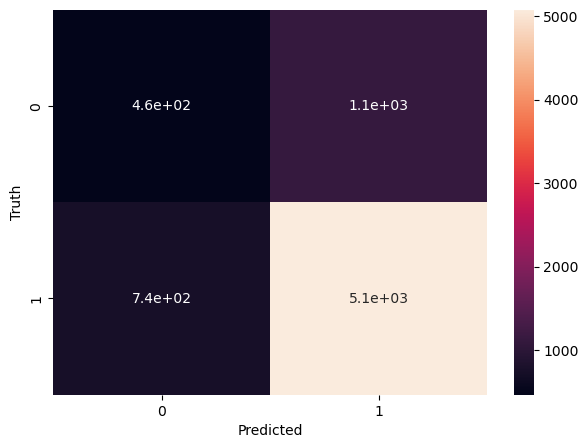

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, zero_division=0)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

# Print in markdown table format

print(f"| **Accuracy**      | {accuracy:.2%} |")
print(f"| **Precision**     | {precision:.2%} |")
print(f"| **Recall**        | {recall:.2%} |")
print(f"| **F1-Score**      | {f1:.2%} |")
print(f"| **RMSE**          | {rmse:.2f} |")


| **Accuracy**      | 74.89% |
| **Precision**     | 81.99% |
| **Recall**        | 87.23% |
| **F1-Score**      | 84.53% |
| **RMSE**          | 0.50 |


# Model Comparison

| Model                | Train Accuracy | Test Accuracy | CV Score |
|---------------------|----------------|---------------|----------|
| Logistic Regression    | 0.99         | 0.99        | 0.785    |
| Decision Tree | 1.0        | 1.0        | 0.703    |
| Support Vector Machine        | 0.932          | 0.931         | 0.785    |
| Random Forest       | 1.0        | 1.0         | 0.744    |


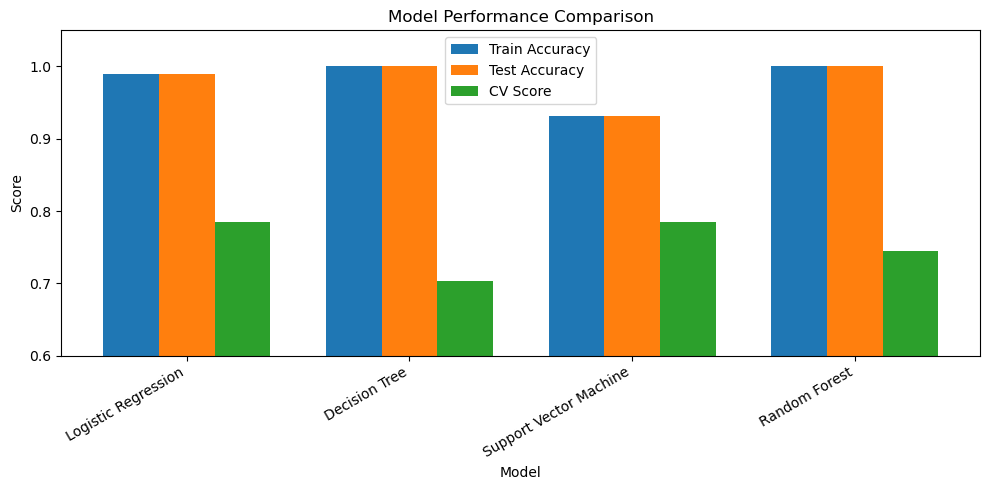

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated Data
models = [
    "Logistic Regression", 
    "Decision Tree", 
    "Support Vector Machine", 
    "Random Forest"
]
train_acc = [0.99, 1.0, 0.932, 1.0]
test_acc = [0.99, 1.0, 0.931, 1.0]
cv_score = [0.785, 0.703, 0.785, 0.744]

# Create DataFrame
data = pd.DataFrame({
    "Model": models,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc,
    "CV Score": cv_score
})

# Plotting
plt.figure(figsize=(10, 5))
bar_width = 0.25
x = range(len(models))

plt.bar([p - bar_width for p in x], data["Train Accuracy"], width=bar_width, label="Train Accuracy")
plt.bar(x, data["Test Accuracy"], width=bar_width, label="Test Accuracy")
plt.bar([p + bar_width for p in x], data["CV Score"], width=bar_width, label="CV Score")

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(ticks=x, labels=models, rotation=30, ha='right')
plt.ylim(0.6, 1.05)
plt.legend()
plt.tight_layout()

plt.show()


- #### Out of all the models Random Forest  model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

### <center> Machine Learning -2

In [104]:
# Define features and target variable
features1 = df[['Rating', 'Size', 'Installs', 'Reviews', 'Price']]
target1 = df['Type']  # 0 for Free, 1 for Paid

In [105]:
X_train,X_test,y_train,y_test=train_test_split(features1,target1,train_size=0.2)

### LogisticRegression

In [106]:
model_log=LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [107]:
print(model_log.score(X_train,y_train))
print(model_log.score(X_test,y_test))
print(cross_val_score(model_log,features1,target1,cv=5).mean())

0.9994591671173607
0.9987837837837837
0.9988108108108108


#### DecisionTree Classifier

In [108]:
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
print(model_tree.score(X_train,y_train))
print(model_tree.score(X_test,y_test))
print(cross_val_score(model_tree,features1,target1,cv=5).mean())

1.0
1.0
1.0


In [110]:
y_predicted=model_tree.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, zero_division=0)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

# Print in markdown table format

print(f"| **Accuracy**      | {accuracy:.2%} |")
print(f"| **Precision**     | {precision:.2%} |")
print(f"| **Recall**        | {recall:.2%} |")
print(f"| **F1-Score**      | {f1:.2%} |")
print(f"| **RMSE**          | {rmse:.2f} |")


| **Accuracy**      | 100.00% |
| **Precision**     | 100.00% |
| **Recall**        | 100.00% |
| **F1-Score**      | 100.00% |
| **RMSE**          | 0.00 |


#### Support Vector Machine

In [112]:
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [113]:
print(model_svc.score(X_train,y_train))
print(model_svc.score(X_test,y_test))
print(cross_val_score(model_svc,features1,target1,cv=5).mean())

0.9253650621957815
0.9340540540540541
0.9323170157718563


In [114]:
y_predicted=model_svc.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, zero_division=0)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

# Print in markdown table format

print(f"| **Accuracy**      | {accuracy:.2%} |")
print(f"| **Precision**     | {precision:.2%} |")
print(f"| **Recall**        | {recall:.2%} |")
print(f"| **F1-Score**      | {f1:.2%} |")
print(f"| **RMSE**          | {rmse:.2f} |")


| **Accuracy**      | 93.41% |
| **Precision**     | 0.00% |
| **Recall**        | 0.00% |
| **F1-Score**      | 0.00% |
| **RMSE**          | 0.26 |


#### Random Forest Classifier

In [116]:
model_rf=RandomForestClassifier(n_estimators=30)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [117]:
print(model_rf.score(X_train,y_train))
print(model_rf.score(X_test,y_test))
print(cross_val_score(model_rf,features1,target1,cv=5).mean())

1.0
1.0
1.0


In [118]:
y_predicted=model_rf.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, zero_division=0)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

# Print in markdown table format

print(f"| **Accuracy**      | {accuracy:.2%} |")
print(f"| **Precision**     | {precision:.2%} |")
print(f"| **Recall**        | {recall:.2%} |")
print(f"| **F1-Score**      | {f1:.2%} |")
print(f"| **RMSE**          | {rmse:.2f} |")


| **Accuracy**      | 100.00% |
| **Precision**     | 100.00% |
| **Recall**        | 100.00% |
| **F1-Score**      | 100.00% |
| **RMSE**          | 0.00 |


# Model Comparison

| Model                | Train Accuracy | Test Accuracy | CV Score |
|---------------------|----------------|---------------|----------|
| Logistic Regression    | 0.98         | 0.98        | 0.99    |
| Decision Tree | 1.0        | 1.0        | 1.0    |
| Support Vector Machine        | 0.937         | 0.931         | 0.932    |
| Random Forest       | 1.0        | 1.0         | 1.0    |


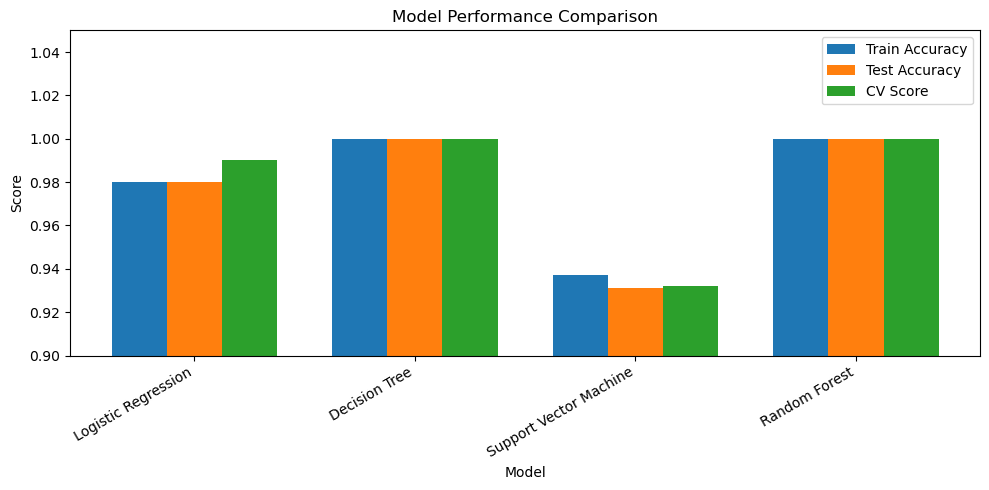

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# Your Table Data
models = [
    "Logistic Regression", 
    "Decision Tree", 
    "Support Vector Machine", 
    "Random Forest"
]
train_acc = [0.98, 1.0, 0.937, 1.0]
test_acc = [0.98, 1.0, 0.931, 1.0]
cv_score = [0.99, 1.0, 0.932, 1.0]

# Create DataFrame
datastore = pd.DataFrame({
    "Model": models,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc,
    "CV Score": cv_score
})

# Plot
plt.figure(figsize=(10, 5))
bar_width = 0.25
x = range(len(models))

plt.bar([p - bar_width for p in x], datastore["Train Accuracy"], width=bar_width, label="Train Accuracy")
plt.bar(x, datastore["Test Accuracy"], width=bar_width, label="Test Accuracy")
plt.bar([p + bar_width for p in x], datastore["CV Score"], width=bar_width, label="CV Score")

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(ticks=x, labels=models, rotation=30, ha='right')
plt.ylim(0.9, 1.05)
plt.legend()
plt.tight_layout()

plt.show()


- #### Out of all the models Decision Tree and Random Forest  model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.